In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Preprocess the data

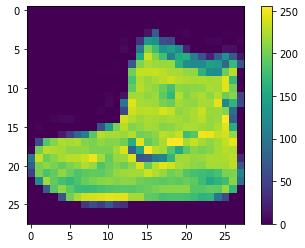

In [34]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [35]:
train_images = train_images / 255.0

test_images = test_images / 255.0

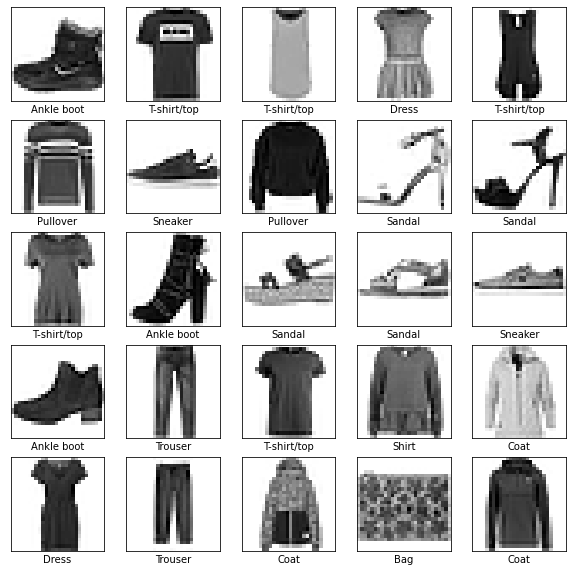

In [36]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Построение модели

In [45]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10)
])

In [46]:
model.compile(optimizer='nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [47]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4598 - accuracy: 0.8325
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3437 - accuracy: 0.8747
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3112 - accuracy: 0.8850
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2898 - accuracy: 0.8917
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2715 - accuracy: 0.8980
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2566 - accuracy: 0.9029
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2451 - accuracy: 0.9076
Epoch 8/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2349 - accuracy: 0.9107
Epoch 9/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2236 - accuracy: 0.9154
Epoch 10/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.215

In [48]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.4196 - accuracy: 0.8864

Test accuracy: 0.8863999843597412


### Предсказания нейросети

In [49]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [50]:
predictions = probability_model.predict(test_images)

In [51]:
predictions[0]

array([4.4827352e-08, 3.2805300e-10, 2.4992400e-10, 2.2361047e-07,
       3.5318094e-13, 2.5233910e-06, 1.6096376e-10, 1.7398568e-03,
       8.6329393e-08, 9.9825722e-01], dtype=float32)

In [52]:
np.argmax(predictions[0])

9

In [53]:
test_labels[0]

9

In [54]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Проверка предсказаний

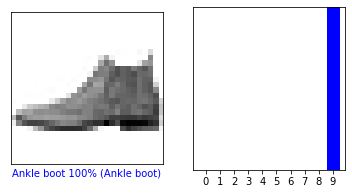

In [55]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

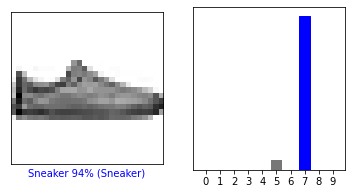

In [56]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

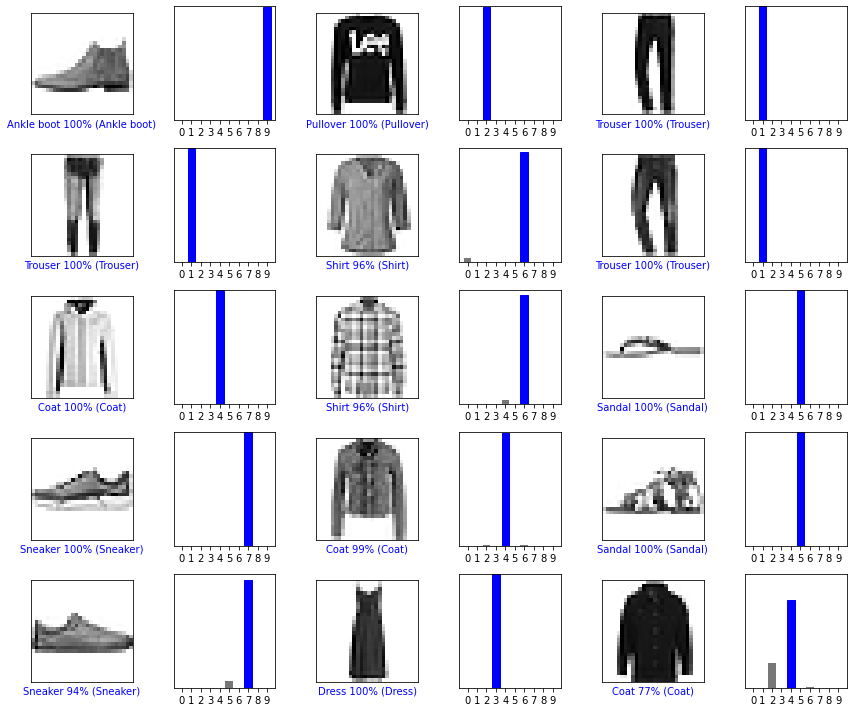

In [57]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

На данном датасете удалось получить улучшения после добавления еще одного слоя (добавляла также и 5,6 и 7, но улучшений это не дало), увеличение нейронов во втором и третьем слое до 256 (уевличивала и больше, но улучшения результата на было). 
Также изменила Оптимизатор 